<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_4_Wines_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ερώτημα 1

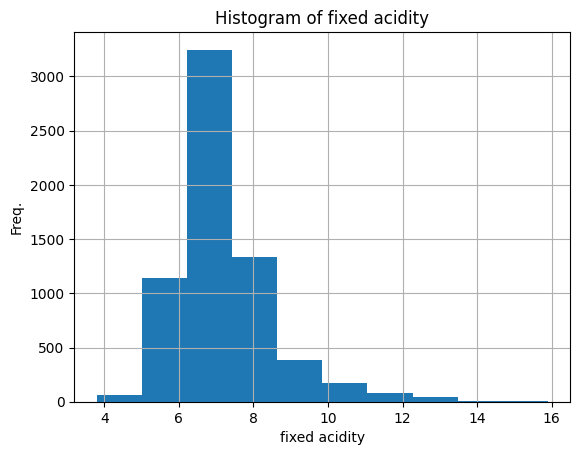

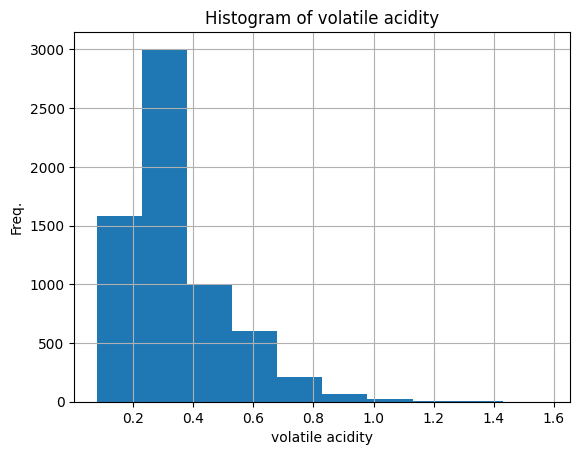

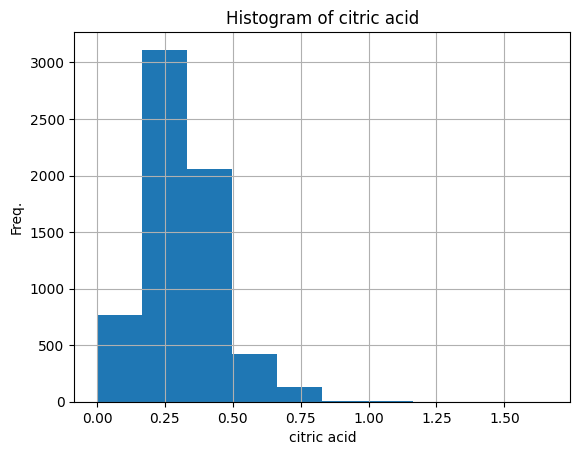

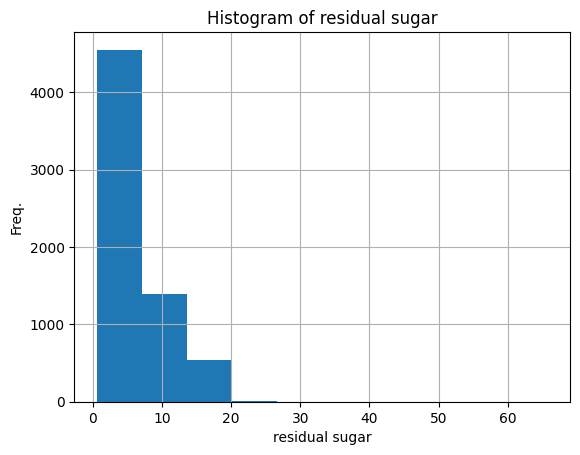

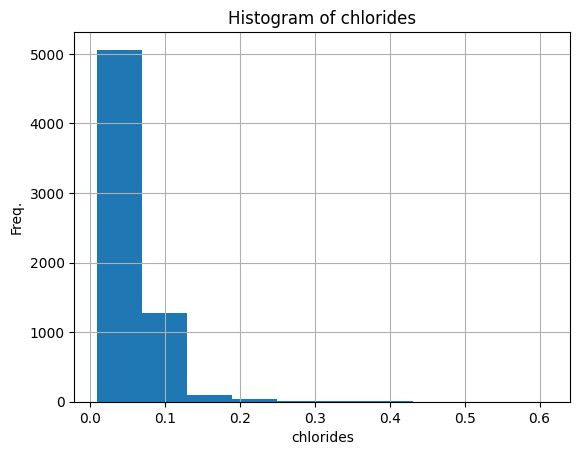

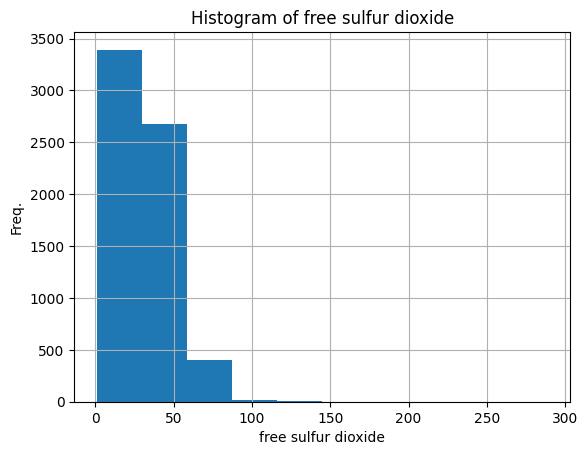

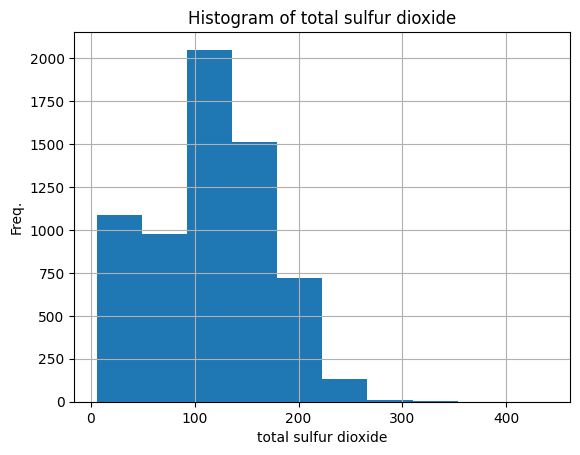

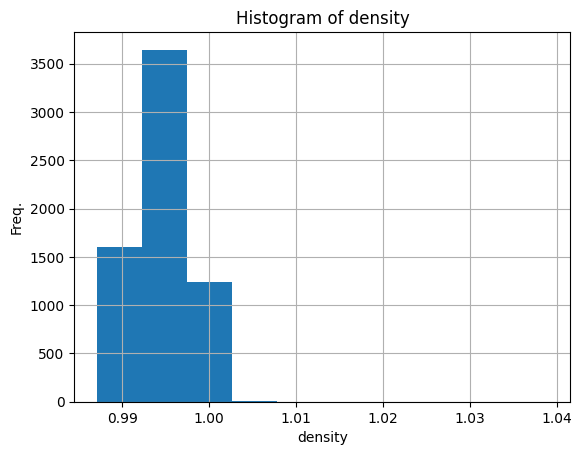

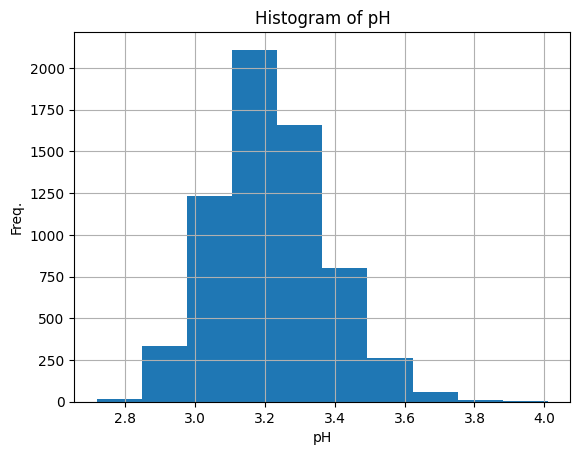

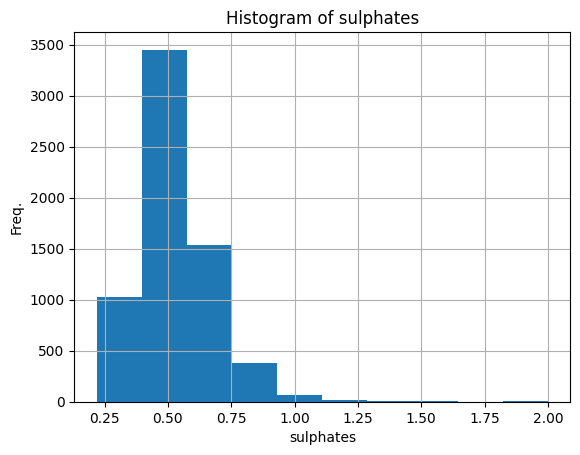

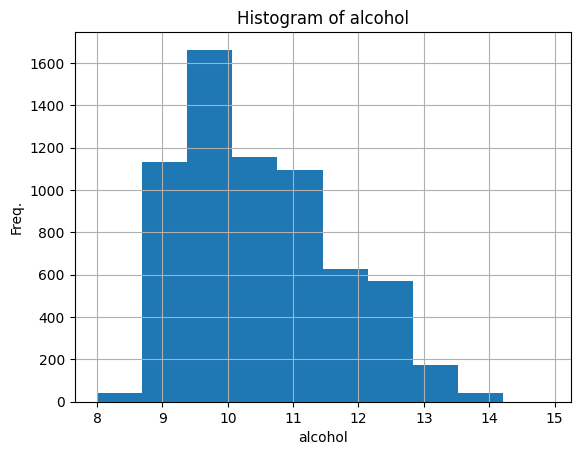

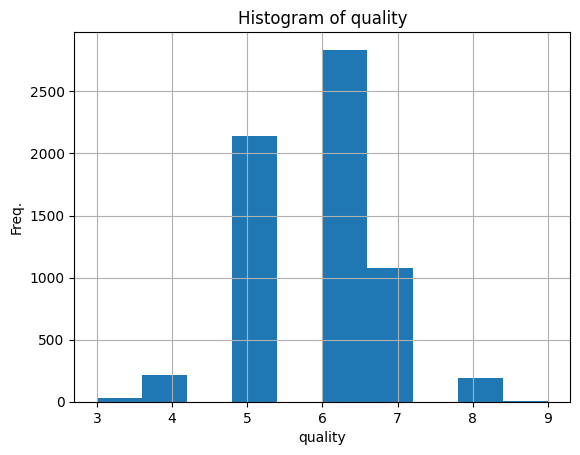

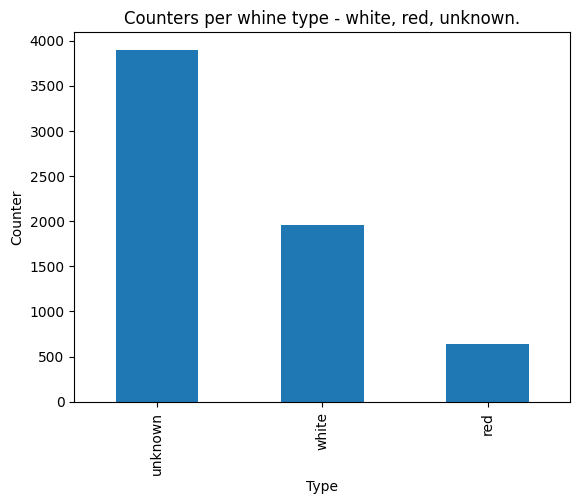

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/wine-missing.csv")

histogram_attributes = df.select_dtypes(include='number').columns

for attribute in histogram_attributes:
    plt.figure()
    df[attribute].hist()
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Freq.')
    plt.show()

plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title('Counters per whine type - white, red, unknown.')
plt.xlabel('Type')
plt.ylabel('Counter')
plt.show()

Έχουμε αρκετές τιμές που λείπουν σε αρκετά attrs, και τα περισσότερα κρασιά ανοίκουν στην κατηγορία unknown (αρκετά κακό, και ευχαριστούμε που μας κάνετε τη ζωή δύσκολη 😅).

Τα περισσότερα attrs δεν έχουν ομοιόμορφη κατανομή. Επίσης, η πλοιοψηφία των βαθμολογιών για ένα κρασί βρίσκονται ή στο 5, ή μεταξύ 6 και 7. Το περίεργο είναι πως δεν υπάρχει βαθμολογία που να είναι 6 παρά. Επομένως τα κρασιά είτε θα είναι αρκετά καλά, είτε αρκετά κακά.

Τέλος, κάπως το ιστόγραμμα του pH φαίνεται να είναι πιο κοντά σε μία γραφική "καμπάνα", που σημαίνει πως οι τιμές είναι κοντά στο mean με μια ελαφριά κλίση προς τα αριστερά. Τα υπόλοιπα attrs έχουν αριστερόστροφη ασύμετρη κατανομή.

# Ερώτημα 2

In [297]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df['type'] = df['type'].map(mapping)

y = df["type"].to_numpy()
x = df.drop(columns=["type"]).to_numpy()

x.shape, y.shape


((6497, 12), (6497,))

# Ερώτημα 3

In [298]:
set_unknown = (y == 2)
set_known = ~set_unknown

x_known = x[set_known]
y_known = y[set_known]
x_unknown = x[set_unknown]

x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

# Ερώτημα 4

In [299]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.30, random_state=42, stratify=y_known
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

print("Total nans in x_train:", np.isnan(x_train).sum())
print("Total nans in x_test :", np.isnan(x_test).sum())
print("Total nans in y_train:", np.isnan(y_train).sum())
print("Total nans in y_test :", np.isnan(y_test).sum())

Total nans in x_train: 9
Total nans in x_test : 1
Total nans in y_train: 0
Total nans in y_test : 0


# Ερώτημα 5

In [300]:
import json
random_f = RandomForestClassifier(
    random_state=42
)
random_f.fit(x_train, y_train)

y_pred_train = random_f.predict(x_train)
y_pred_test = random_f.predict(x_test)

results = {
    "train_result": {
        "accuracy": accuracy_score(y_train, y_pred_train),
        "precision": precision_score(y_train, y_pred_train),
        "recall": recall_score(y_train, y_pred_train),
        "f1": f1_score(y_train, y_pred_train),
    },
    "test_result": {
        "accuracy": accuracy_score(y_test, y_pred_test),
        "precision": precision_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test),
    }
}

print(json.dumps(results, indent=4))


{
    "train_result": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test_result": {
        "accuracy": 0.9987179487179487,
        "precision": 0.9948186528497409,
        "recall": 1.0,
        "f1": 0.9974025974025974
    }
}


Το F1 ειναι καλυτερο, γιατι πρακτικα χρησ/ει το precision και το recall για να εχει πιο accurate αποτελεσμα απο το accuracy. Στη συγκεκριμενη ομως περιπτωση, o classifier μας (RF) λειτουργησε ιδανικα θα ελεγε κανεις. Επομενως το accuracy και το F1 φαινεται να ειναι παρεμφερη, οριακα ιδια. Σε διαφορετικη περιπτωση, ο F1 θα ηταν καλυτερη λυση γιατι σε δεδομενα τα οποια εχουν μεγαλη διαφορα ισορροπιας, λειτουργει καλυτερα διοτι οπως ειπα και παραπανω λαμβανει υποψην το recall και το precision βαγζοντας καλυτερο αποτελεσμα. το Accuracy αν το δειγμα μας εχει ανισορροπια της ταξης 80-20, θα εδινε 80% πιθανοτητα να βαθμολογησει μια unknown τιμη, το οποιο ειναι και λαθος. Επειδη το precision ειναι 99,7% - διοτι το RF εκανε πολυ καλη δουλεια - και επειδη μπορει να καταλαβει ποιο ειναι το κοκκινο κρασι με αριστο τροπο, σημαινει οτι και το accuracy θα εχει την ιδια αξια σε αυτο το παραδειγμα δεδομενων και υπο αυτες τις συνθηκες.


---


**Συμπερασμα**: το F1 σε ΜΗ ισορροπημενα δεδομενα θα λειτουργει παντα καλυτερα (επομενως στο δικο μας εκ των προτερων ειναι καλυτερο λογω του 75-25 μεταξυ λευκων και ερυθρων). Στο συγκεκριμενο ομως παραδειγμα, λογω του αριστου precision που βρηκε ο RF, δεν εχει απολυτως καμια σημασια καθως το accuracy ειναι σχεδον ιδιο με το F1.

# Ερώτημα 6

In [301]:
random_f_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)
random_f_balanced.fit(x_train, y_train)

y_pred_train_balanced = random_f_balanced.predict(x_train)
y_pred_test_balanced = random_f_balanced.predict(x_test)

results_balanced = {
    "train_result_balanced": {
        "accuracy": accuracy_score(y_train, y_pred_train_balanced),
        "precision": precision_score(y_train, y_pred_train_balanced),
        "recall": recall_score(y_train, y_pred_train_balanced),
        "f1": f1_score(y_train, y_pred_train_balanced),
    },
    "test_result_balanced": {
        "accuracy": accuracy_score(y_test, y_pred_test_balanced),
        "precision": precision_score(y_test, y_pred_test_balanced),
        "recall": recall_score(y_test, y_pred_test_balanced),
        "f1": f1_score(y_test, y_pred_test_balanced),
    }
}

print(json.dumps(results_balanced, indent=4))

{
    "train_result_balanced": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test_result_balanced": {
        "accuracy": 0.9948717948717949,
        "precision": 0.9947368421052631,
        "recall": 0.984375,
        "f1": 0.9895287958115183
    }
}


Εξήγηση μεταβλητης balanced: συμφωνα με τη scikit βιβλιοθηκη, η μεταβλητη αυτη κανει την RF μεθοδολογια να λαβει υποψην την οχι τοσο equaly represented κλαση παραπανω ωστε να ισορροπισει οσο γινεται το δειγμα, για να βγαλει πιο ρεαλιστικο αποτελεσμα η ιδια η μεθοδολογια. Ετσι μειωνεται το bias του αποτελεσματος οταν υπαρχουν μη ισορροπημενο dataset (πρακτικα κανει τα βαρη των μη represented κλασεων πιο υψηλα).


1.   **Source**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2.   **Source ref**: The “balanced” mode uses the values of y to automatically adjust weights **inversely proportional** to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`


# Ερώτημα 7

In [302]:
y_unknown_proba = random_f_balanced.predict_proba(x_unknown)

y_unknown_proba[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Ερώτημα 8

In [303]:
classes = random_f_balanced.classes_
white_index = int(np.where(classes == 0)[0][0])
red_index = int(np.where(classes == 1)[0][0])

prob_white = y_unknown_proba[:, white_index]
prob_red = y_unknown_proba[:, red_index]

y_unknown_pred = np.full(P_red.shape[0], "unknown", dtype=object)
y_unknown_pred[prob_red > 0.65] = "red"
y_unknown_pred[prob_white > 0.65] = "white"

#print("counts:", {
#    "white": (y_unknown_pred == "white").sum(),
#    "red":   (y_unknown_pred == "red").sum(),
#    "unknown": (y_unknown_pred == "unknown").sum()
#})
#print("preview:", y_unknown_pred[:20])


# Ερώτημα 9

In [304]:
import json

label_to_int = {"white": 0, "red": 1}
set_labeled = np.isin(y_unknown_pred, ["white", "red"])

x_unknown_labeled = x_unknown[set_labeled]
y_unknown_labeled = np.vectorize(label_to_int.get)(y_unknown_pred[set_labeled])

print("sample added to the training set:", x_unknown_labeled.shape[0])

x_train_augmented = np.vstack([x_train, x_unknown_labeled])
y_train_augmented = np.hstack([y_train, y_unknown_labeled])

print("train size:", x_train.shape[0])
print("updated train size:", x_train_augmented.shape[0])

random_f_trained_again = RandomForestClassifier(random_state=42, class_weight='balanced')
random_f_trained_again.fit(x_train_augmented, y_train_augmented)

y_pred_train = random_f_trained_again.predict(x_train)
y_pred_test = random_f_trained_again.predict(x_test)

results_random_f_trained_again = {
    "train": {
        "accuracy": accuracy_score(y_train, y_pred_train),
        "precision": precision_score(y_train, y_pred_train),
        "recall": recall_score(y_train, y_pred_train),
        "f1": f1_score(y_train, y_pred_train)
    },
    "test": {
        "accuracy": accuracy_score(y_test, y_pred_test),
        "precision": precision_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "f1": f1_score(y_test, y_pred_test)
    }
}

print("\nResults of RD (trained again):")
print(json.dumps(results_random_f_trained_again, indent=4))

sample added to the training set: 3847
train size: 1819
updated train size: 5666

Results of RD (trained again):
{
    "train": {
        "accuracy": 0.999450247388675,
        "precision": 0.9977728285077951,
        "recall": 1.0,
        "f1": 0.9988851727982163
    },
    "test": {
        "accuracy": 0.9948717948717949,
        "precision": 0.9947368421052631,
        "recall": 0.984375,
        "f1": 0.9895287958115183
    }
}


# Ερώτημα 10

In [310]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = random_f_balanced
x_tr, y_tr = x_train.copy(), y_train.copy()
xu = x_unknown.copy()

w_idx = np.where(model.classes_ == 0)[0][0]  # white
r_idx = np.where(model.classes_ == 1)[0][0]  # red

while xu.shape[0] > 0:
    probs = model.predict_proba(xu)
    pw, prd = probs[:, w_idx], probs[:, r_idx]

    y_pseudo = np.full(xu.shape[0], -1)
    y_pseudo[prd >= 0.65] = 1     # red
    y_pseudo[pw  >= 0.65] = 0     # white
    m = (y_pseudo != -1)
    if m.sum() == 0: break

    x_tr = np.vstack([x_tr, xu[m]])
    y_tr = np.concatenate([y_tr, y_pseudo[m]])
    xu   = xu[~m]

    model = RandomForestClassifier(random_state=42, class_weight='balanced').fit(x_tr, y_tr)

print("Τελικό μέγεθος train:", x_tr.shape[0], "| Unknown που απέμειναν:", xu.shape[0])


Τελικό μέγεθος train: 5696 | Unknown που απέμειναν: 21


Δοκιμασα να παω το ποσοστο στο 54%, οπου και το τελευταιο unknown εξαφανιζεται. Με 65% μενουν 21 unknowns. Κραταω το 65 λογω της εκφωνησης αλλα και γιατι ειναι ενα καλο ποσοστο που 'σκοτωνει' τα περισσοτερο unknowns κρατοντας μονο λιγα (21).